In [55]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import  KNeighborsClassifier as Knn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from utils import csvTolist, skater_season_stats


In [29]:
player_ids = csvTolist('playerIds20232024.csv')
stats = skater_season_stats('realtime', player_ids[0], 20232024)
stats.get('data')[0]

{'blockedShots': 22,
 'blockedShotsPer60': 3.72,
 'emptyNetAssists': 0,
 'emptyNetGoals': 0,
 'emptyNetPoints': 0,
 'firstGoals': 0,
 'gamesPlayed': 32,
 'giveaways': 10,
 'giveawaysPer60': 1.69,
 'hits': 35,
 'hitsPer60': 5.92,
 'lastName': 'Wahlstrom',
 'missedShotCrossbar': 2,
 'missedShotGoalpost': 2,
 'missedShotOverNet': 1,
 'missedShotShort': 0,
 'missedShotWideOfNet': 8,
 'missedShots': 13,
 'otGoals': 0,
 'playerId': 8480789,
 'positionCode': 'R',
 'seasonId': 20232024,
 'shootsCatches': 'R',
 'shotAttemptsBlocked': 28,
 'skaterFullName': 'Oliver Wahlstrom',
 'takeaways': 10,
 'takeawaysPer60': 1.69,
 'teamAbbrevs': 'NYI',
 'timeOnIcePerGame': 664.21}

In [24]:
df_stat_summary= pd.read_csv('player_list.csv', index_col='playerId')
df_stat_summary.drop(df_stat_summary.columns[0], axis=1)


,assists,evGoals,evPoints,faceoffWinPct,gameWinningGoals,gamesPlayed,goals,lastName,otGoals,penaltyMinutes,...,ppPoints,seasonId,shGoals,shPoints,shootingPct,shootsCatches,shots,skaterFullName,teamAbbrevs,timeOnIcePerGame
playerId,,,,,,,,,,,,,,,,,,,,,
8480789,4,1,4,0.41666,0,32,2,Wahlstrom,0,8,...,2,20232024,0,0,0.04878,R,41,Oliver Wahlstrom,NYI,664.2187
8480796,14,5,18,NaN,0,70,5,Fehervary,0,26,...,0,20232024,0,1,0.07246,L,69,Martin Fehervary,WSH,1185.1142
8480797,28,20,43,0.37500,2,82,22,Farabee,1,37,...,7,20232024,0,0,0.12087,L,182,Joel Farabee,PHI,971.1829
8480798,36,12,35,0.46350,3,75,18,Kurashev,1,23,...,19,20232024,0,0,0.14062,L,128,Philipp Kurashev,CHI,1141.1066
8480800,85,12,59,NaN,2,95,17,Hughes,1,44,...,43,20232024,0,0,0.07727,L,220,Quinn Hughes,VAN,1478.9473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474590,43,5,32,NaN,5,86,11,Carlson,0,42,...,22,20232024,0,0,0.05789,R,190,John Carlson,WSH,1562.7093
8474600,64,14,53,NaN,5,88,24,Josi,2,47,...,34,20232024,0,1,0.08540,L,281,Roman Josi,NSH,1482.3522
8482803,7,2,7,NaN,0,26,2,Zellweger,0,4,...,2,20232024,0,0,0.05882,L,34,Olen Zellweger,ANA,1157.0769


In [36]:
df_stat_summary.join(df, on= rsuffix='rt', validate='one_to_many').head()


,Unnamed: 0,assists,evGoals,evPoints,faceoffWinPct,gameWinningGoals,gamesPlayed,goals,lastName,otGoals,...,otGoalsrt,playerId,positionCodert,shootsCatchesrt,shotAttemptsBlocked,skaterFullNamert,takeaways,takeawaysPer60,teamAbbrevsrt,timeOnIcePerGamert
playerId,,,,,,,,,,,,,,,,,,,,,
8480789,0,4,1,4,0.41666,0,32,2,Wahlstrom,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8480796,1,14,5,18,NaN,0,70,5,Fehervary,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8480797,2,28,20,43,0.37500,2,82,22,Farabee,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8480798,3,36,12,35,0.46350,3,75,18,Kurashev,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8480800,4,85,12,59,NaN,2,95,17,Hughes,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
all_player_stats = []
season_id = 20232024
stat = 'realtime'
def allplayer_statlist(stattype: str, season_id: int) -> list:
   all_player_stats = []
   
   for id in player_ids:
      stats = skater_season_stats(stattype, id, season_id)
      try:
         all_player_stats.append(stats.get('data')[0])
      except:
         pass
   return all_player_stats
   print(len(all_player_stats))


df = pd.DataFrame(allplayer_statlist(stat, season_id))
#df.to_csv('player_list.csv')
df = df.drop(labels='seasonId', axis= 1)
df = df.set_index('playerId')
df.head()

,blockedShots,blockedShotsPer60,emptyNetAssists,emptyNetGoals,emptyNetPoints,firstGoals,gamesPlayed,giveaways,giveawaysPer60,hits,...,missedShots,otGoals,positionCode,shootsCatches,shotAttemptsBlocked,skaterFullName,takeaways,takeawaysPer60,teamAbbrevs,timeOnIcePerGame
playerId,,,,,,,,,,,,,,,,,,,,,
8480789,22,3.72,0.0,0,0.0,0,32,10,1.69,35,...,13,0,R,R,28,Oliver Wahlstrom,10,1.69,NYI,664.21
8480796,118,5.12,2.0,0,2.0,1,70,14,0.60,204,...,27,0,D,L,57,Martin Fehervary,9,0.39,WSH,1185.11
8480797,50,2.26,0.0,1,1.0,6,82,28,1.26,67,...,67,1,L,L,58,Joel Farabee,28,1.26,PHI,971.18
8480798,48,2.01,1.0,1,2.0,2,75,28,1.17,27,...,69,1,C,L,83,Philipp Kurashev,43,1.80,CHI,1141.10
8480800,69,1.76,1.0,1,2.0,6,95,58,1.48,33,...,118,1,D,L,277,Quinn Hughes,47,1.20,VAN,1478.94


In [47]:
df.to_csv('realtime202324.csv')

In [ ]:
stat_types = ['summary', 'goalsForAgainst', 'realtime', 'penalties', 'shottype']
str(stat_types)

"['summary', 'goalsForAgainst', 'realtime', 'penalties', 'shottype']"

<Axes: >

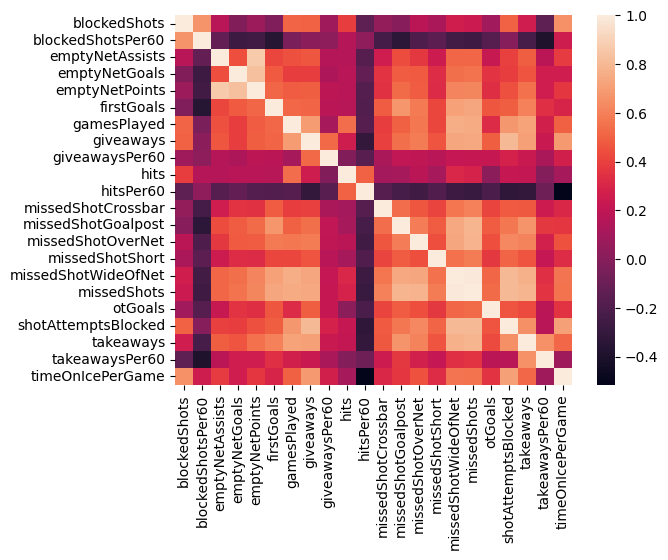

In [54]:
#sns.heatmap(df_stat_summary.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True))

In [57]:
Classifier = Knn()
Classifier = Knn.fit(df)

AttributeError: 'DataFrame' object has no attribute '_validate_params'